### Q chat 10 question features with toddlers 

A1: Does your child look at you when you call his/her name?

A2: How easy is it for you to get eye contact with your child?

A3: Does your child point to indicate that s/he wants something?

A4: Does your child point to share an interest with you?

A5: Does your child pretend? e.g. care for dolls, talk on a toy phone?

A6: Does your child follow where you are looking?

A7: If you or someone else in the family is visibly upset, does your child show signs of waning to comfort them? e.g. stroking hair, hugging them)

A8: Would you describe your child's first word as:

A9: Does your child use simple gestures (e.g.wave goodbye)?

A10:Does your child stare at  nothing with no apparent purpose?







# Functions to evaluate the model


In [1]:
### define our metrics function with plotting confusion matrix
import itertools
from sklearn.metrics import confusion_matrix 

### define function for plotting confusion matrix
def plot_confusion_matrix(y_true, y_preds):
    # Print confusion matrix
    cnf_matrix = confusion_matrix(y_true, y_preds)
    # Create the basic matrix
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues)
    # Add title and axis labels
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Add appropriate axis scales
    class_names = set(y) # Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=0)
    plt.yticks(tick_marks, class_names)
    # Add labels to each cell
    thresh = cnf_matrix.max() / 2. # Used for text coloring below
    # Here we iterate through the confusion matrix and append labels to our visualization
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, cnf_matrix[i, j],
                     horizontalalignment='center',
                     color='white' if cnf_matrix[i, j] > thresh else 'white')
    # Add a legend
    plt.colorbar();
    plt.show();
def metrics(model_name, y_train, y_test, y_hat_train, y_hat_test):
    '''Print out the evaluation metrics for a given models predictions'''
    print(f'Model: {model_name}', )
    print('-'*60)
    plot_confusion_matrix(y_test,y_hat_test)
    print(f'test accuracy: {round(accuracy_score(y_test, y_hat_test),2)}')
    print(f'train accuracy: {round(accuracy_score(y_train, y_hat_train),2)}')
    print('-'*60)
    print('-'*60)
    print('Confusion Matrix:\n', pd.crosstab(y_test, y_hat_test, rownames=['Actual'], colnames=['Predicted'],margins = True))
    print('\ntest report:\n' + classification_report(y_test, y_hat_test))
    print('~'*60)
    print('\ntrain report:\n' + classification_report(y_train, y_hat_train))
    print('-'*60)

# Function to draw the feature importances¶

In [2]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8, 8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

# Importing libraries

In [3]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet, LogisticRegression
from sklearn.ensemble import RandomForestClassifier,BaggingRegressor,GradientBoostingClassifier,AdaBoostClassifier 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# Modelling Helpers :
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score, ShuffleSplit, cross_validate

# Preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Metrics :
# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
from sklearn.metrics import accuracy_score

# Classification
from sklearn.metrics import recall_score, f1_score, fbeta_score, r2_score, roc_auc_score, roc_curve, auc, cohen_kappa_score


## To display  all the interactive output without using the print function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Obtain Data

In [5]:
import pandas as pd
df=pd.read_csv('Autism.csv')

# Explore Data

In [6]:
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
5,6,1,1,0,0,1,1,1,1,1,1,21,8,m,black,no,no,family member,Yes
6,7,1,0,0,1,1,1,0,0,1,0,33,5,m,asian,yes,no,family member,Yes
7,8,0,1,0,0,1,0,1,1,1,1,33,6,m,asian,yes,no,family member,Yes
8,9,0,0,0,0,0,0,1,0,0,1,36,2,m,asian,no,no,family member,No
9,10,1,1,1,0,1,1,0,1,1,1,22,8,m,south asian,no,no,Health Care Professional,Yes


# To know the dimension of our data

In [7]:
df.shape

(1054, 19)

## This project was collected over one tousand fifty four patients and 15 features were used

# collecting stastical info  about our data

In [8]:
df.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


### Displaying Columns

In [9]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

# Removing unneeded Coloumns

In [10]:
df.drop(['Case_No', 'Who completed the test'], axis = 1, inplace = True)
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Class/ASD Traits '],
      dtype='object')

# Calculating the percentage of babies shows the symptoms of autisim


In [11]:
# Calculating the percentage of babies shows the symptoms of autisim
data_yes= df[df['Class/ASD Traits ']=='Yes']
data_no= df[df['Class/ASD Traits ']=='No']

print("Toddlers with Autism:",len(data_yes)/len(df) * 100)
print("Toddlers with no Autism:",len(data_no)/len(df) * 100)

Toddlers with Autism: 69.07020872865274
Toddlers with no Autism: 30.929791271347252


# Checking null data 

In [12]:
# Checking null data 
df.isnull().sum()

A1                     0
A2                     0
A3                     0
A4                     0
A5                     0
A6                     0
A7                     0
A8                     0
A9                     0
A10                    0
Age_Mons               0
Qchat-10-Score         0
Sex                    0
Ethnicity              0
Jaundice               0
Family_mem_with_ASD    0
Class/ASD Traits       0
dtype: int64

NO missing values are found..!

# Checking the type of the data 

In [13]:
df.dtypes

A1                      int64
A2                      int64
A3                      int64
A4                      int64
A5                      int64
A6                      int64
A7                      int64
A8                      int64
A9                      int64
A10                     int64
Age_Mons                int64
Qchat-10-Score          int64
Sex                    object
Ethnicity              object
Jaundice               object
Family_mem_with_ASD    object
Class/ASD Traits       object
dtype: object

## Investigating the correlation through plotting pearson method heatmap

<Figure size 1500x1500 with 0 Axes>

<Axes: >

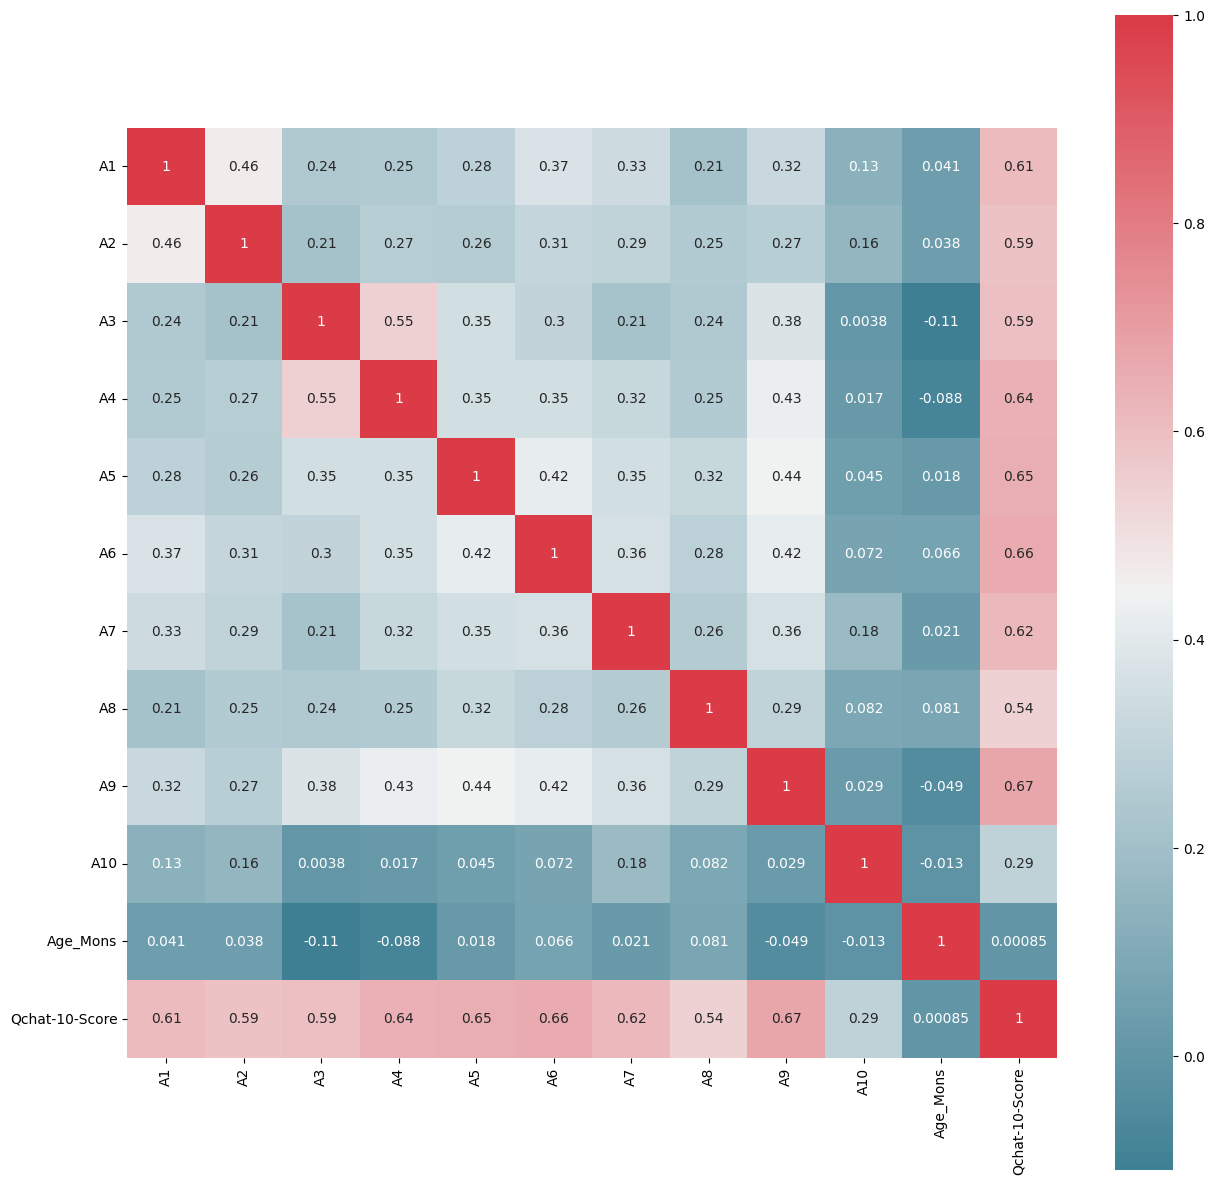

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True) # set a diverging color palette
sns.heatmap(data=corr, annot=True, square=True, cbar=True, cmap=cmap)
plt.show()

### # Visualizing Juandice occurance in males and females

<Figure size 1000x800 with 0 Axes>

<Axes: xlabel='Jaundice', ylabel='count'>

Text(0.5, 1.0, 'Occurrence of Jaundice in Males and Females')

Text(0.5, 0, 'Jaundice')

Text(0, 0.5, 'Count')

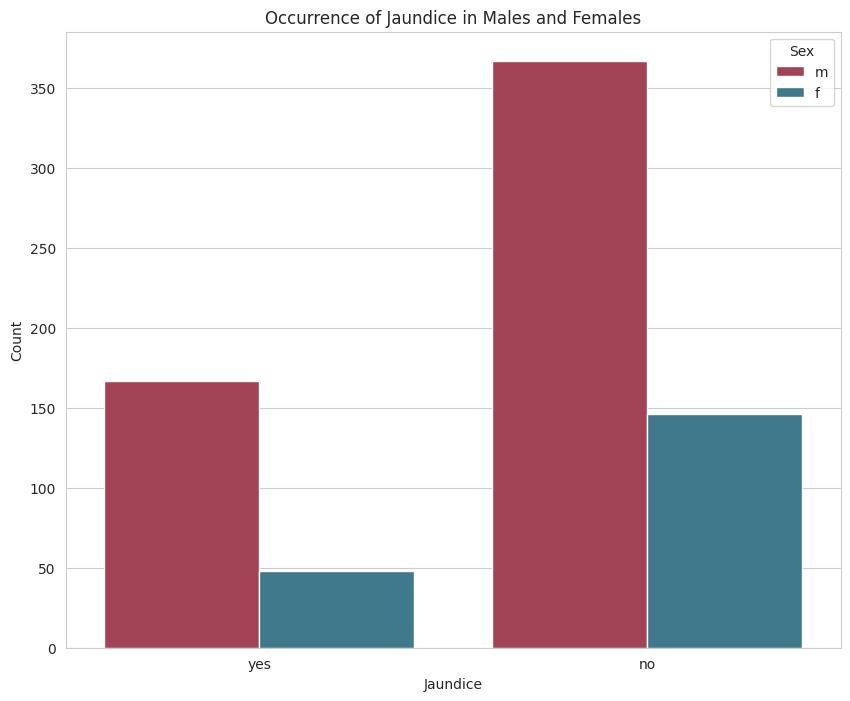

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.set_style('whitegrid')

# define a custom color palette using RGB values
colors = [(0.7, 0.2, 0.3), (0.2, 0.5, 0.6)]
custom_palette = sns.color_palette(colors)

# plot the countplot with the custom palette and add labels
sns.countplot(x='Jaundice', hue='Sex', data=data_yes, palette=custom_palette)
plt.title('Occurrence of Jaundice in Males and Females')
plt.xlabel('Jaundice')
plt.ylabel('Count')

plt.show()


### In Toddlers, jaundice is nearly 2 times in males than in  females. This sample studies shows that Jaundice is not connected to Autisim

# Visualizing The Q-chat 10 Score according to the gender

<Axes: xlabel='Qchat-10-Score', ylabel='count'>

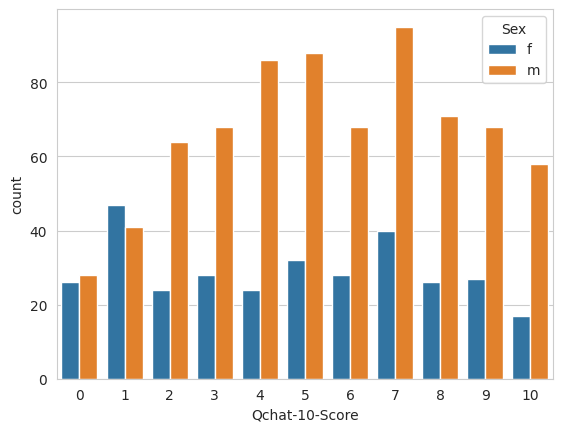

In [16]:
sns.countplot(x = 'Qchat-10-Score', hue = 'Sex', data = df)

In general,Plot shows that the Qchat has more postive answers among males than females. That reflects males  are more postive to autisim than females.

#Visualizing  the age distribution of Positive ASD  among Todllers

<Axes: xlabel='Age_Mons', ylabel='count'>

Text(0.5, 0, 'Toddlers age in months')

Text(0.5, 1.0, 'Age distribution of ASD positive')

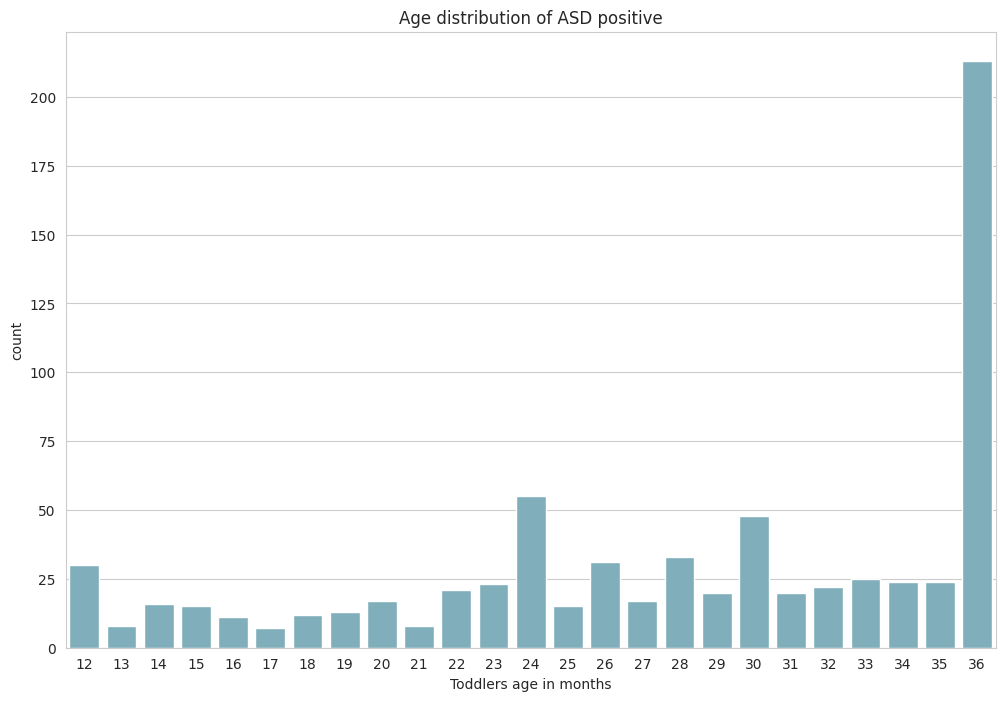

In [17]:
#Visualizing  the age distribution of Positive ASD  among Todllers


f, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x="Age_Mons", data=data_yes, color="#76b5c5");

plt.style.use('dark_background')
ax.set_xlabel('Toddlers age in months')
ax.set_title('Age distribution of ASD positive')

In age close to 36 months which is three years show more positive autisim.

<Figure size 1600x800 with 0 Axes>

<Axes: xlabel='Ethnicity', ylabel='count'>

Text(0.5, 1.0, 'ASD Positive Toddlers by Ethnicity')

Text(0.5, 0, 'Ethnicity')

Text(0, 0.5, 'Count')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'White European'),
  Text(1, 0, 'middle eastern'),
  Text(2, 0, 'Hispanic'),
  Text(3, 0, 'black'),
  Text(4, 0, 'asian'),
  Text(5, 0, 'south asian'),
  Text(6, 0, 'Native Indian'),
  Text(7, 0, 'Others'),
  Text(8, 0, 'Latino'),
  Text(9, 0, 'mixed'),
  Text(10, 0, 'Pacifica')])

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250'),
  Text(0, 300.0, '300')])

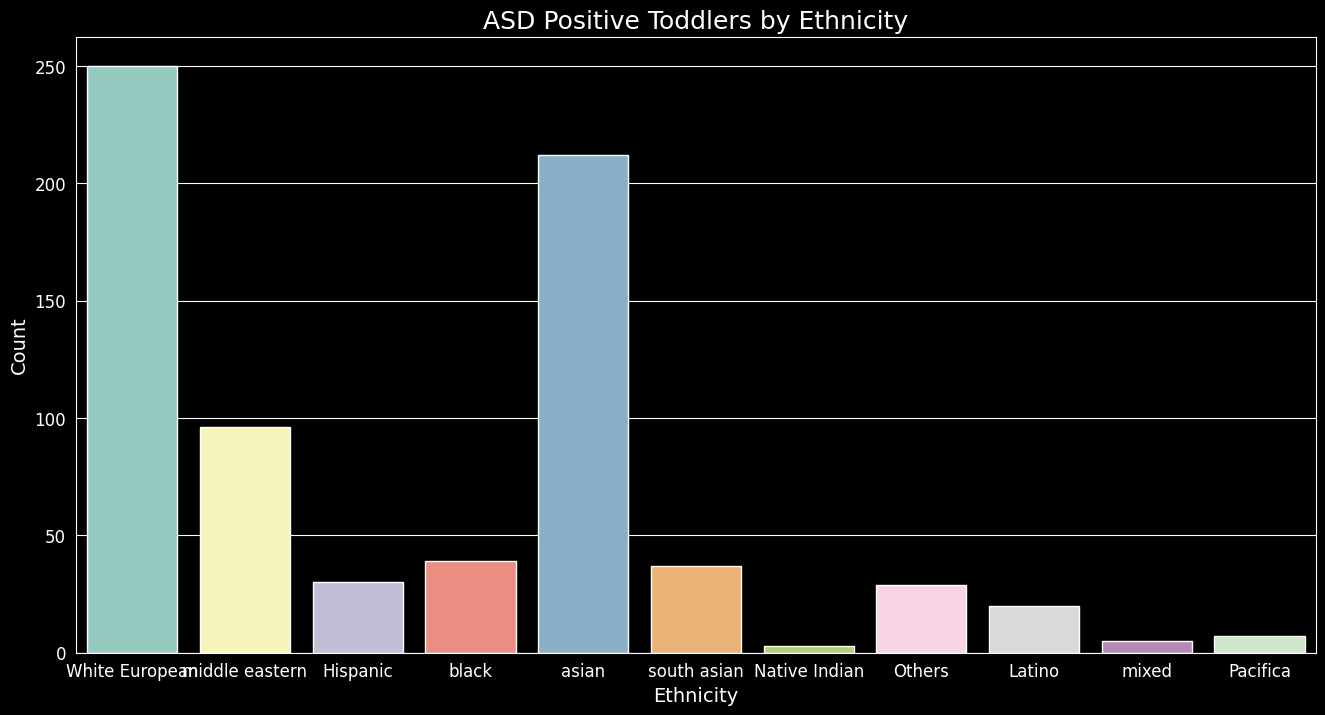

In [18]:
plt.figure(figsize = (16,8))
sns.countplot(x = 'Ethnicity', data = data_yes, palette="Set3")
plt.title('ASD Positive Toddlers by Ethnicity', fontsize=18)
plt.xlabel('Ethnicity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.show()

### White European ,Asian  then middle eastern are the most etnicity showed increase in autisim cases.

#  visualize positive  ASD among Toddlers based on Ethnicity


<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='Ethnicity', ylabel='count'>

Text(0.5, 1.0, 'Ethnicity Distribution of Positive ASD among Toddlers')

Text(0.5, 0, 'Ethnicity')

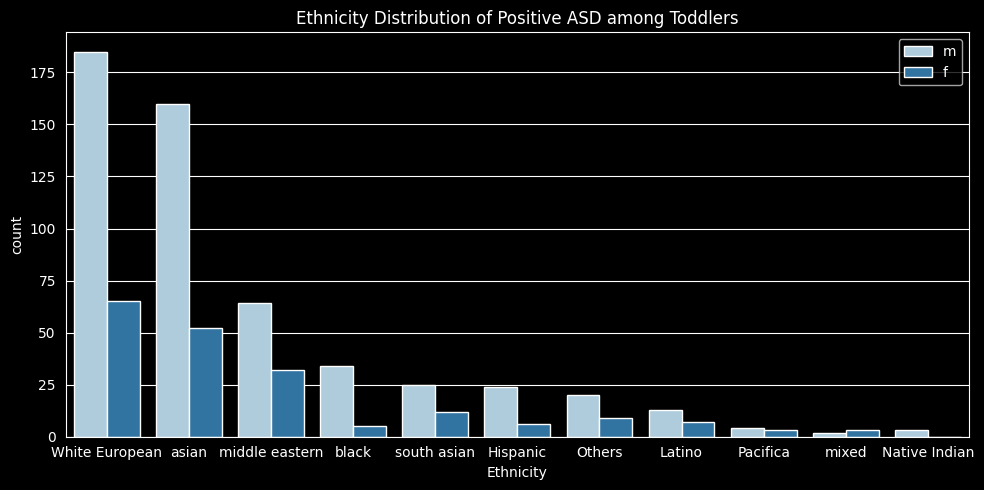

In [19]:
#  visualize positive  ASD among Toddlers based on Ethnicity
plt.figure(figsize=(10,5))
sns.countplot(x='Ethnicity',data=data_yes,order= data_yes['Ethnicity'].value_counts().index[:11],hue='Sex',palette='Paired')
plt.title('Ethnicity Distribution of Positive ASD among Toddlers')
plt.xlabel('Ethnicity')
plt.legend(loc="upper right")
plt.tight_layout()

### White European then Asian indeed are the most affected ethnicity. But we can notice that males have more  positive  autisim compared to females.



**Displaying number of positive cases of Autisim with Regards Ethnicity**


In [20]:
# Displaying number of positive cases of Autisim with Regards Ethnicity
data_yes['Ethnicity'].value_counts()

White European    250
asian             212
middle eastern     96
black              39
south asian        37
Hispanic           30
Others             29
Latino             20
Pacifica            7
mixed               5
Native Indian       3
Name: Ethnicity, dtype: int64

In [21]:
# Displaying number of positive cases of Autisim with Regards Ethnicity
data_no['Ethnicity'].value_counts()

middle eastern    92
asian             87
White European    84
south asian       23
black             14
Hispanic          10
Others             6
Latino             6
mixed              3
Pacifica           1
Name: Ethnicity, dtype: int64

### visualizing the distribution of autism in family within different ethnicity

<Axes: xlabel='Family_mem_with_ASD', ylabel='count'>

Text(0.5, 1.0, 'Positive ASD Toddler relatives with Autism distribution for different ethnicities')

Text(0.5, 0, 'Toddler Relatives with ASD')

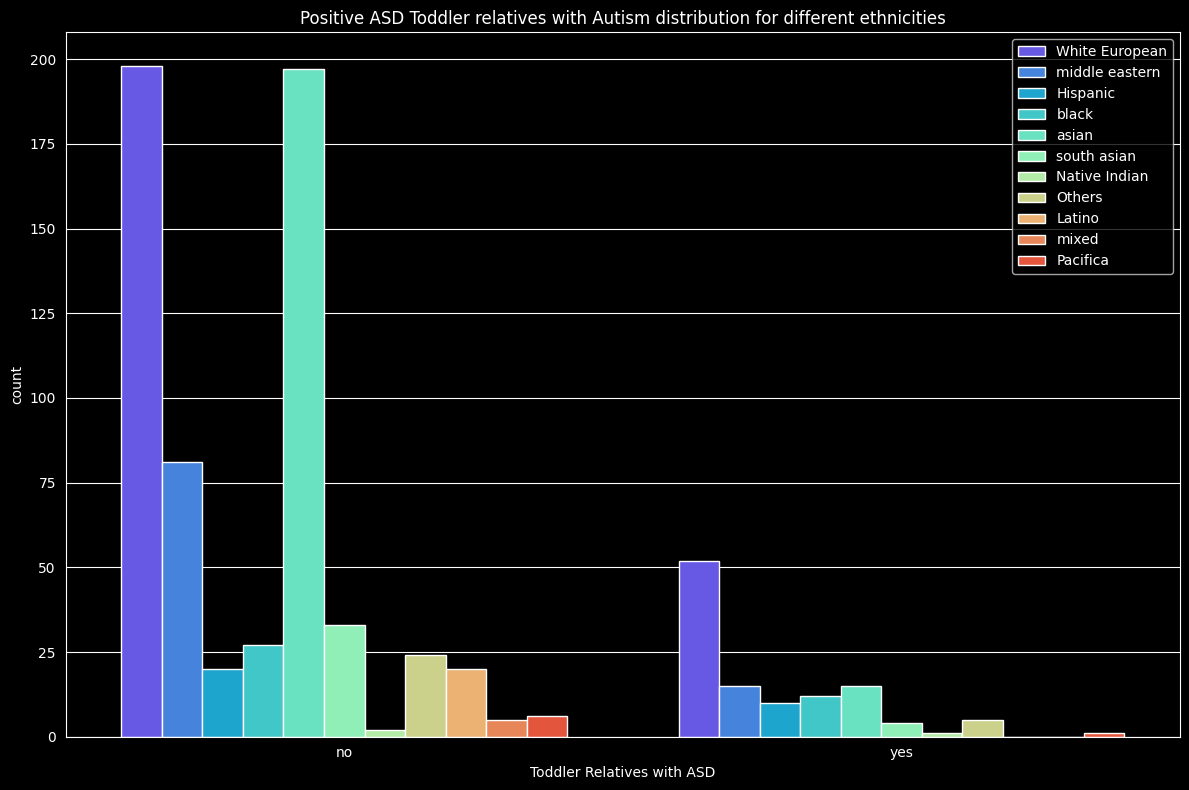

In [22]:
#Lets visualize the distribution of autism in family within different ethnicity
f, ax = plt.subplots(figsize=(12, 8))


sns.countplot(x='Family_mem_with_ASD',data=data_yes,hue='Ethnicity',palette='rainbow',ax=ax)
ax.set_title('Positive ASD Toddler relatives with Autism distribution for different ethnicities')
ax.set_xlabel('Toddler Relatives with ASD')
plt.legend(loc="upper right")
plt.tight_layout()

In general family history shows small effect in autisim.
However, we can see that  toddlers of White Europeans Ethnicities have very high chance of being ASD positive if they have it in their genes. Middle eastern and Asians follow the next though with smaller ratios.So We can somewhat conclude  that there is a genetic connect for ASD positive.

In [23]:
# removing 'Qchat-10-Score'
df.drop('Qchat-10-Score', axis = 1, inplace = True)

### Preprocessing features to get them ready for modeling through encoding caterogical features

In [24]:
le = LabelEncoder()
columns = ['Ethnicity', 'Family_mem_with_ASD', 'Class/ASD Traits ', 'Sex', 'Jaundice']
for col in columns:
    df[col] = le.fit_transform(df[col])
df.dtypes


A1                     int64
A2                     int64
A3                     int64
A4                     int64
A5                     int64
A6                     int64
A7                     int64
A8                     int64
A9                     int64
A10                    int64
Age_Mons               int64
Sex                    int64
Ethnicity              int64
Jaundice               int64
Family_mem_with_ASD    int64
Class/ASD Traits       int64
dtype: object

In [25]:
df.head(25)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,0,8,1,0,0
1,1,1,0,0,0,1,1,0,0,0,36,1,5,1,0,1
2,1,0,0,0,0,0,1,1,0,1,36,1,8,1,0,1
3,1,1,1,1,1,1,1,1,1,1,24,1,0,0,0,1
4,1,1,0,1,1,1,1,1,1,1,20,0,5,0,1,1
5,1,1,0,0,1,1,1,1,1,1,21,1,7,0,0,1
6,1,0,0,1,1,1,0,0,1,0,33,1,6,1,0,1
7,0,1,0,0,1,0,1,1,1,1,33,1,6,1,0,1
8,0,0,0,0,0,0,1,0,0,1,36,1,6,0,0,0
9,1,1,1,0,1,1,0,1,1,1,22,1,10,0,0,1


In [26]:
X = df.drop(['Class/ASD Traits '], axis = 1)
y = df['Class/ASD Traits ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =42)
X.isnull().sum()
X.info()

A1                     0
A2                     0
A3                     0
A4                     0
A5                     0
A6                     0
A7                     0
A8                     0
A9                     0
A10                    0
Age_Mons               0
Sex                    0
Ethnicity              0
Jaundice               0
Family_mem_with_ASD    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   A1                   1054 non-null   int64
 1   A2                   1054 non-null   int64
 2   A3                   1054 non-null   int64
 3   A4                   1054 non-null   int64
 4   A5                   1054 non-null   int64
 5   A6                   1054 non-null   int64
 6   A7                   1054 non-null   int64
 7   A8                   1054 non-null   int64
 8   A9                   1054 non-null   int64
 9   A10                  1054 non-null   int64
 10  Age_Mons             1054 non-null   int64
 11  Sex                  1054 non-null   int64
 12  Ethnicity            1054 non-null   int64
 13  Jaundice             1054 non-null   int64
 14  Family_mem_with_ASD  1054 non-null   int64
dtypes: int64(15)
memory usage: 123.6 KB


LogisticRegression()

LR Accuracy Score is :  1.0
Model: LR
------------------------------------------------------------


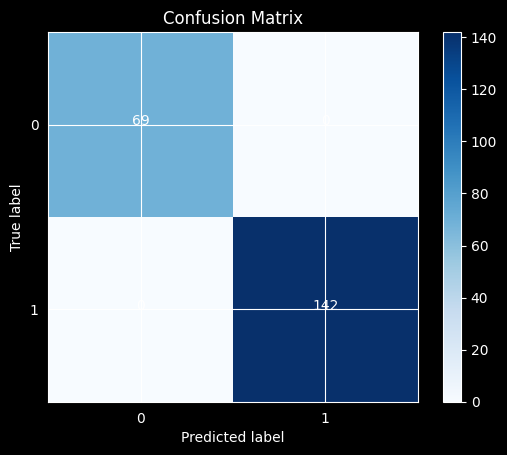

test accuracy: 1.0
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted   0    1  All
Actual                 
0          69    0   69
1           0  142  142
All        69  142  211

test report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00       142

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       257
           1       1.00      1.00      1.00       586

    accuracy                           1.00       843
   macro avg       1.00      1.00      1.00       843
weighted av

LinearDiscriminantAnalysis()

LDA Accuracy Score is :  0.9715639810426541
Model: LDA
------------------------------------------------------------


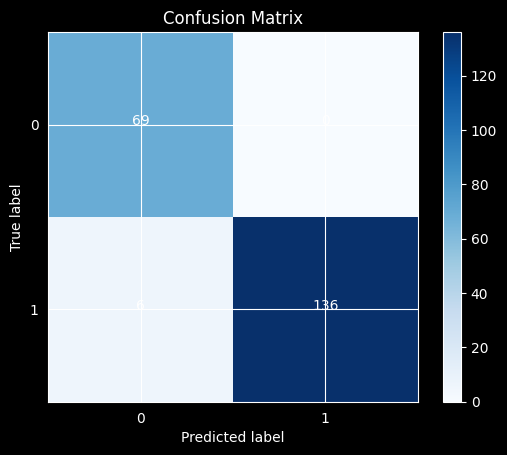

test accuracy: 0.97
train accuracy: 0.96
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted   0    1  All
Actual                 
0          69    0   69
1           6  136  142
All        75  136  211

test report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        69
           1       1.00      0.96      0.98       142

    accuracy                           0.97       211
   macro avg       0.96      0.98      0.97       211
weighted avg       0.97      0.97      0.97       211

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       257
           1       0.99      0.95      0.97       586

    accuracy                           0.96       843
   macro avg       0.94      0.96      0.95       843
weighted 

KNeighborsClassifier()

KNN Accuracy Score is :  0.8909952606635071
Model: KNN
------------------------------------------------------------


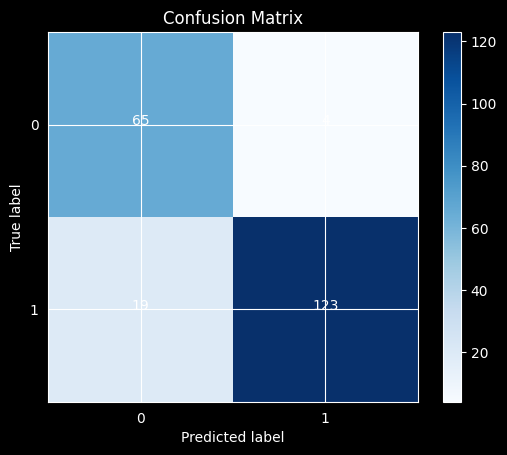

test accuracy: 0.89
train accuracy: 0.95
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted   0    1  All
Actual                 
0          65    4   69
1          19  123  142
All        84  127  211

test report:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        69
           1       0.97      0.87      0.91       142

    accuracy                           0.89       211
   macro avg       0.87      0.90      0.88       211
weighted avg       0.90      0.89      0.89       211

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       257
           1       0.98      0.95      0.97       586

    accuracy                           0.95       843
   macro avg       0.94      0.95      0.94       843
weighted 

DecisionTreeClassifier()

CART Accuracy Score is :  0.9620853080568721
Model: CART
------------------------------------------------------------


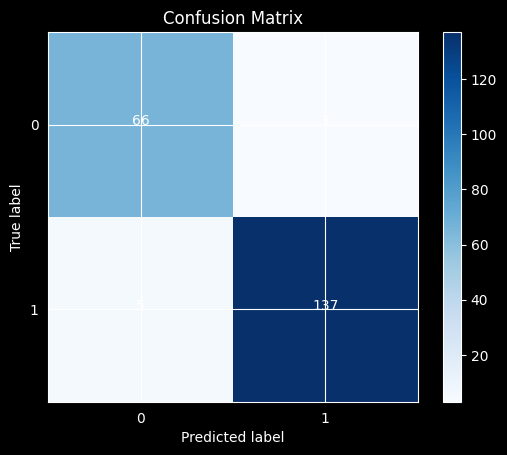

test accuracy: 0.96
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted   0    1  All
Actual                 
0          66    3   69
1           5  137  142
All        71  140  211

test report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        69
           1       0.98      0.96      0.97       142

    accuracy                           0.96       211
   macro avg       0.95      0.96      0.96       211
weighted avg       0.96      0.96      0.96       211

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       257
           1       1.00      1.00      1.00       586

    accuracy                           1.00       843
   macro avg       1.00      1.00      1.00       843
weighted a

GaussianNB()

NB Accuracy Score is :  0.95260663507109
Model: NB
------------------------------------------------------------


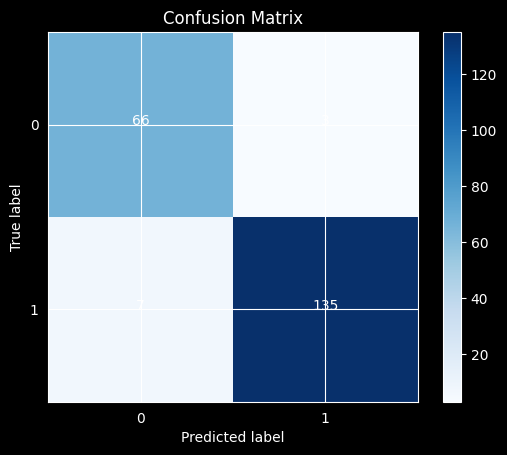

test accuracy: 0.95
train accuracy: 0.95
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted   0    1  All
Actual                 
0          66    3   69
1           7  135  142
All        73  138  211

test report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        69
           1       0.98      0.95      0.96       142

    accuracy                           0.95       211
   macro avg       0.94      0.95      0.95       211
weighted avg       0.95      0.95      0.95       211

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       257
           1       0.97      0.96      0.96       586

    accuracy                           0.95       843
   macro avg       0.94      0.94      0.94       843
weighted 

SVC()

SVM Accuracy Score is :  0.8815165876777251
Model: SVM
------------------------------------------------------------


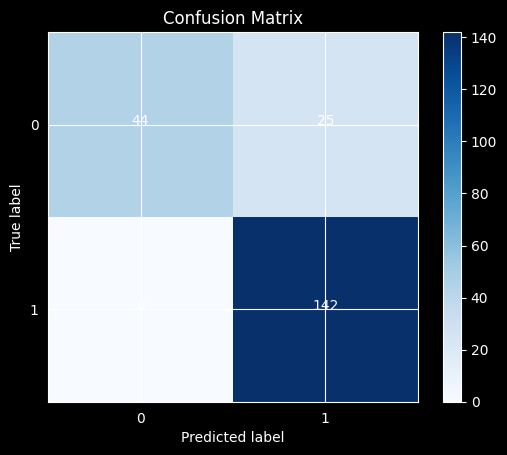

test accuracy: 0.88
train accuracy: 0.84
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted   0    1  All
Actual                 
0          44   25   69
1           0  142  142
All        44  167  211

test report:
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        69
           1       0.85      1.00      0.92       142

    accuracy                           0.88       211
   macro avg       0.93      0.82      0.85       211
weighted avg       0.90      0.88      0.87       211

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.97      0.49      0.65       257
           1       0.82      0.99      0.90       586

    accuracy                           0.84       843
   macro avg       0.89      0.74      0.78       843
weighted 

RandomForestClassifier()

RF Accuracy Score is :  0.981042654028436
Model: RF
------------------------------------------------------------


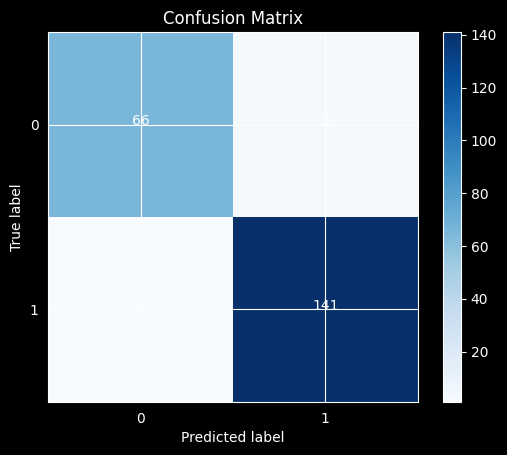

test accuracy: 0.98
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted   0    1  All
Actual                 
0          66    3   69
1           1  141  142
All        67  144  211

test report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        69
           1       0.98      0.99      0.99       142

    accuracy                           0.98       211
   macro avg       0.98      0.97      0.98       211
weighted avg       0.98      0.98      0.98       211

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       257
           1       1.00      1.00      1.00       586

    accuracy                           1.00       843
   macro avg       1.00      1.00      1.00       843
weighted a

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

XGB Accuracy Score is :  0.985781990521327
Model: XGB
------------------------------------------------------------


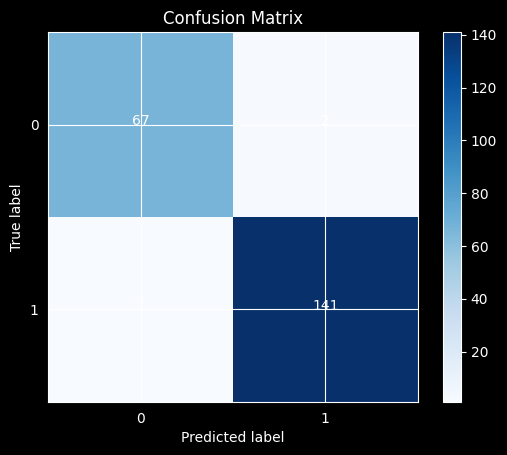

test accuracy: 0.99
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted   0    1  All
Actual                 
0          67    2   69
1           1  141  142
All        68  143  211

test report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        69
           1       0.99      0.99      0.99       142

    accuracy                           0.99       211
   macro avg       0.99      0.98      0.98       211
weighted avg       0.99      0.99      0.99       211

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       257
           1       1.00      1.00      1.00       586

    accuracy                           1.00       843
   macro avg       1.00      1.00      1.00       843
weighted a

GradientBoostingClassifier()

GB Accuracy Score is :  0.990521327014218
Model: GB
------------------------------------------------------------


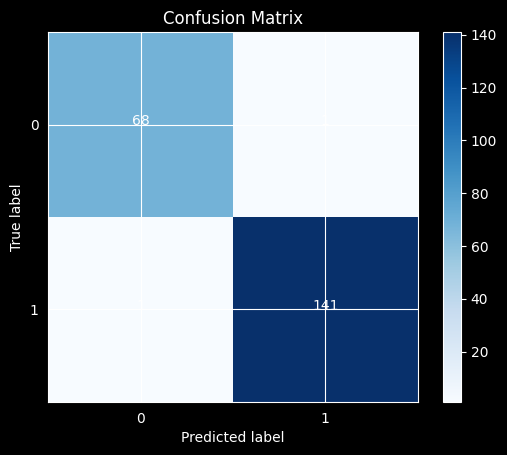

test accuracy: 0.99
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted   0    1  All
Actual                 
0          68    1   69
1           1  141  142
All        69  142  211

test report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        69
           1       0.99      0.99      0.99       142

    accuracy                           0.99       211
   macro avg       0.99      0.99      0.99       211
weighted avg       0.99      0.99      0.99       211

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       257
           1       1.00      1.00      1.00       586

    accuracy                           1.00       843
   macro avg       1.00      1.00      1.00       843
weighted a

AdaBoostClassifier()

AB Accuracy Score is :  1.0
Model: AB
------------------------------------------------------------


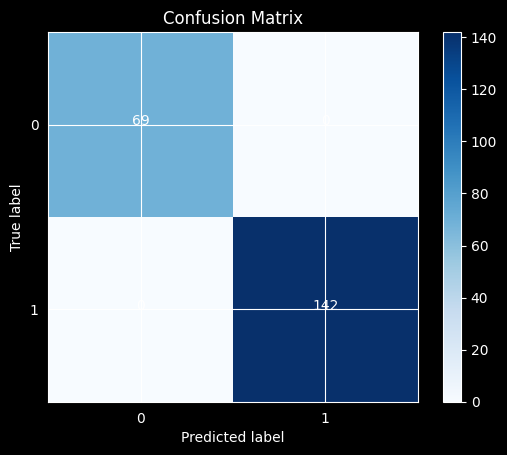

test accuracy: 1.0
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted   0    1  All
Actual                 
0          69    0   69
1           0  142  142
All        69  142  211

test report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00       142

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       257
           1       1.00      1.00      1.00       586

    accuracy                           1.00       843
   macro avg       1.00      1.00      1.00       843
weighted av

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('AB', AdaBoostClassifier()))

for name, model in models:
    model.fit(X_train, y_train)
    y_hat_test = model.predict(X_test).astype(int)
    y_hat_train = model.predict(X_train).astype(int)
    print(name, 'Accuracy Score is : ', accuracy_score(y_test, y_hat_test))

    metrics(name, y_train, y_test, y_hat_train, y_hat_test)

StackingClassifier(estimators=[('LR', LogisticRegression()),
                               ('LDA', LinearDiscriminantAnalysis()),
                               ('KNN', KNeighborsClassifier()),
                               ('CART', DecisionTreeClassifier()),
                               ('NB', GaussianNB()), ('SVM', SVC())],
                   final_estimator=RandomForestClassifier())

Stacked Accuracy Score is :  1.0
Model: Stacked
------------------------------------------------------------


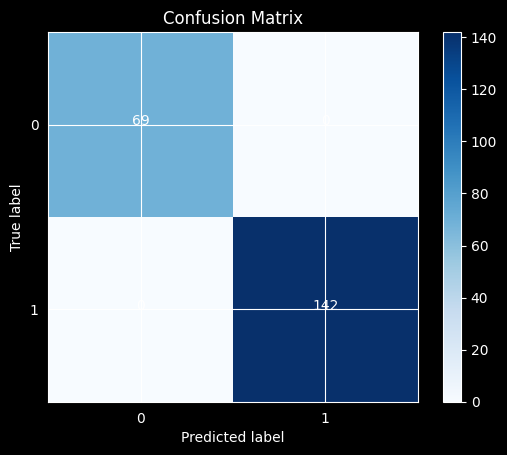

test accuracy: 1.0
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted   0    1  All
Actual                 
0          69    0   69
1           0  142  142
All        69  142  211

test report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00       142

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       257
           1       1.00      1.00      1.00       586

    accuracy                           1.00       843
   macro avg       1.00      1.00      1.00       843
weighted av

BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

Bagging Accuracy Score is :  0.9383886255924171
Model: Bagging
------------------------------------------------------------


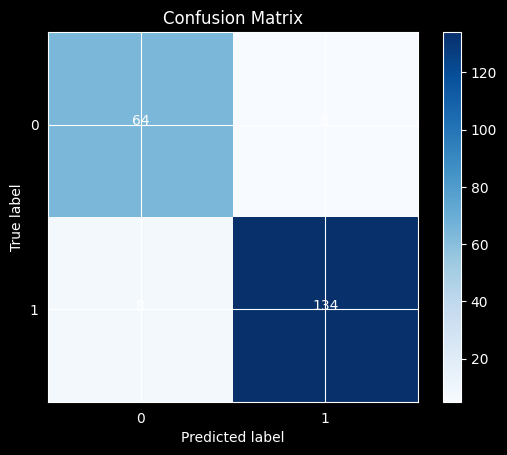

test accuracy: 0.94
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted   0    1  All
Actual                 
0          64    5   69
1           8  134  142
All        72  139  211

test report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        69
           1       0.96      0.94      0.95       142

    accuracy                           0.94       211
   macro avg       0.93      0.94      0.93       211
weighted avg       0.94      0.94      0.94       211

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       257
           1       1.00      0.99      1.00       586

    accuracy                           1.00       843
   macro avg       0.99      1.00      0.99       843
weighted a

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                   random_state=42)

Boosting Accuracy Score is :  0.9478672985781991
Model: Boosting
------------------------------------------------------------


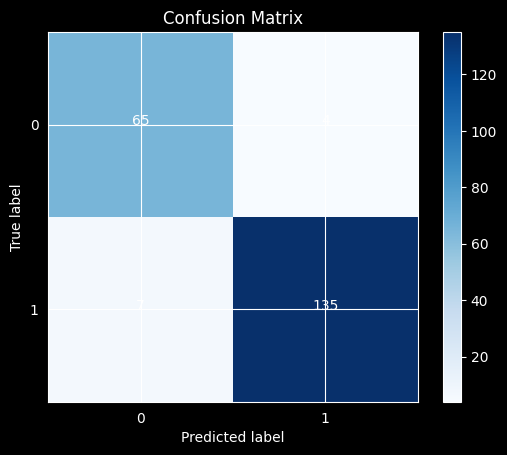

test accuracy: 0.95
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted   0    1  All
Actual                 
0          65    4   69
1           7  135  142
All        72  139  211

test report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        69
           1       0.97      0.95      0.96       142

    accuracy                           0.95       211
   macro avg       0.94      0.95      0.94       211
weighted avg       0.95      0.95      0.95       211

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       257
           1       1.00      1.00      1.00       586

    accuracy                           1.00       843
   macro avg       1.00      1.00      1.00       843
weighted a

In [28]:
from sklearn.ensemble import StackingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# create base models
base_models = []
base_models.append(('LR', LogisticRegression()))
base_models.append(('LDA', LinearDiscriminantAnalysis()))
base_models.append(('KNN', KNeighborsClassifier()))
base_models.append(('CART', DecisionTreeClassifier()))
base_models.append(('NB', GaussianNB()))
base_models.append(('SVM', SVC()))

# create ensemble model using stacking classifier
stacked_model = StackingClassifier(estimators=base_models, final_estimator=RandomForestClassifier())

# create ensemble model using bagging classifier
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)

# create ensemble model using boosting classifier
boosting_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

# fit and evaluate models
models1 = []
models1.append(('Stacked', stacked_model))
models1.append(('Bagging', bagging_model))
models1.append(('Boosting', boosting_model))

for name, model in models1:
    model.fit(X_train, y_train)
    y_hat_test = model.predict(X_test).astype(int)
    y_hat_train = model.predict(X_train).astype(int)
    print(name, 'Accuracy Score is : ', accuracy_score(y_test, y_hat_test))

    metrics(name, y_train, y_test, y_hat_train, y_hat_test)

In [30]:
for name, model in models1:
    
    y_hat_test = model.predict(X_test).astype(int)
    y_hat_train = model.predict(X_train).astype(int)
    print(name, 'Accuracy Score is : ',round( accuracy_score(y_test, y_hat_test),2))

Stacked Accuracy Score is :  1.0
Bagging Accuracy Score is :  0.94
Boosting Accuracy Score is :  0.95


**Tuning hyperparametres for SVC**

In [31]:
svc = SVC()

params = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}

clf = GridSearchCV(svc, param_grid = params, scoring = 'accuracy', cv = 10, verbose = 2)

clf.fit(X_train, y_train)
clf.best_params_

Fitting 10 folds for each of 128 candidates, totalling 1280 fits
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=2)

{'C': 0.8, 'gamma': 0.1, 'kernel': 'linear'}

**Re-running model with best parametres**

SVC(C=0.8, gamma=0.1, kernel='linear')

Model: SVC(C=0.8, gamma=0.1, kernel='linear')
------------------------------------------------------------


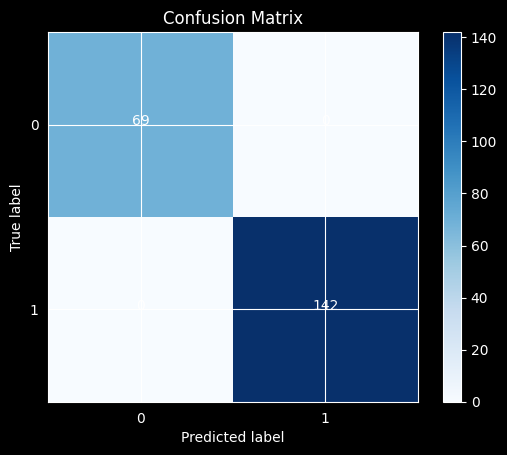

test accuracy: 1.0
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted   0    1  All
Actual                 
0          69    0   69
1           0  142  142
All        69  142  211

test report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00       142

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       257
           1       1.00      1.00      1.00       586

    accuracy                           1.00       843
   macro avg       1.00      1.00      1.00       843
weighted av

1.0

In [32]:
# Re-running model with best parametres
svc1 = SVC(C = 0.8, gamma = 0.1, kernel = 'linear')
svc1.fit(X_train, y_train)
y_hat_test = svc1.predict(X_test)
#print(accuracy_score(y_test, y_hat_test))
metrics(svc1, y_train, y_test, y_hat_train, y_hat_test)
svcgrid_test_acc = round(accuracy_score(y_test, y_hat_test), 2)

svcgrid_test_acc

In [33]:

#Instantiate the pipeline
from sklearn.pipeline import Pipeline

pipe = Pipeline([('classifier', RandomForestClassifier(random_state=123))])


In [35]:
clf = GridSearchCV(estimator=pipe, param_grid=grid,
                   cv=5, scoring='roc_auc', n_jobs=-1)
clf.fit(X_train, y_train)
y_hat_train = clf.predict(X_train)
y_hat_test = clf.predict(X_test)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(random_state=123))]),
             n_jobs=-1,
             param_grid=[{'classifier__class_weight': ['balanced'],
                          'classifier__criterion': ['gini', 'entropy'],
                          'classifier__max_depth': [None, 5, 3, 10],
                          'classifier__min_samples_leaf': [1, 6, 10],
                          'classifier__min_samples_split': [1.0, 6, 10],
                          'classifier__n_estimators': [10, 20, 50, 100]}],
             scoring='roc_auc')

**Print evaluation metrics**

Model: GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(random_state=123))]),
             n_jobs=-1,
             param_grid=[{'classifier__class_weight': ['balanced'],
                          'classifier__criterion': ['gini', 'entropy'],
                          'classifier__max_depth': [None, 5, 3, 10],
                          'classifier__min_samples_leaf': [1, 6, 10],
                          'classifier__min_samples_split': [1.0, 6, 10],
                          'classifier__n_estimators': [10, 20, 50, 100]}],
             scoring='roc_auc')
------------------------------------------------------------


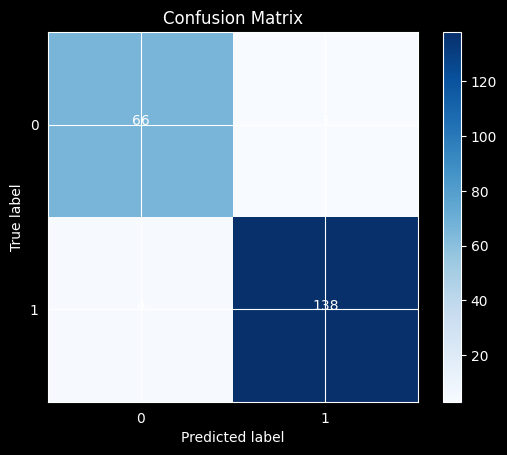

test accuracy: 0.97
train accuracy: 0.99
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted   0    1  All
Actual                 
0          66    3   69
1           4  138  142
All        70  141  211

test report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        69
           1       0.98      0.97      0.98       142

    accuracy                           0.97       211
   macro avg       0.96      0.96      0.96       211
weighted avg       0.97      0.97      0.97       211

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       257
           1       1.00      0.99      0.99       586

    accuracy                           0.99       843
   macro avg       0.98      0.99      0.99       843
weighted 

In [36]:

metrics(clf, y_train, y_test, y_hat_train, y_hat_test)


**Best Scores**

In [37]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9997543193317485
0.9975505205143906


**Best Parameters**

In [38]:
clf.best_params_

{'classifier__class_weight': 'balanced',
 'classifier__criterion': 'entropy',
 'classifier__max_depth': None,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 10,
 'classifier__n_estimators': 50}

In [39]:
# Research best estimator from grid
best_clf_estimator = clf.best_estimator_
best_clf_estimator.fit(X_train,y_train)

Pipeline(steps=[('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy',
                                        min_samples_split=10, n_estimators=50,
                                        random_state=123))])

Model: Pipeline(steps=[('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy',
                                        min_samples_split=10, n_estimators=50,
                                        random_state=123))])
------------------------------------------------------------


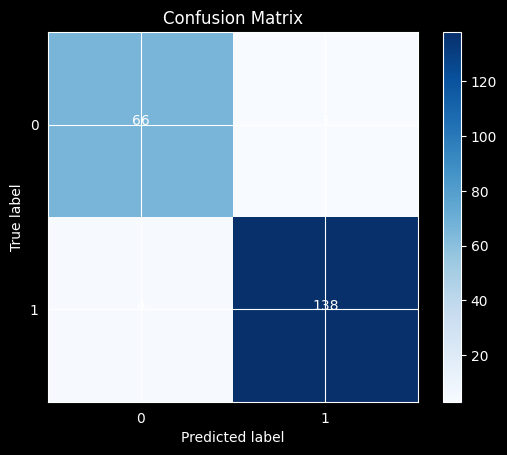

test accuracy: 0.97
train accuracy: 0.99
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted   0    1  All
Actual                 
0          66    3   69
1           4  138  142
All        70  141  211

test report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        69
           1       0.98      0.97      0.98       142

    accuracy                           0.97       211
   macro avg       0.96      0.96      0.96       211
weighted avg       0.97      0.97      0.97       211

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       257
           1       1.00      0.99      0.99       586

    accuracy                           0.99       843
   macro avg       0.98      0.99      0.99       843
weighted 

0.97

In [40]:
#Predictions
y_hat_train=best_clf_estimator.predict(X_train)
y_hat_test = best_clf_estimator.predict(X_test)
results=metrics(best_clf_estimator, y_train, y_test, y_hat_train, y_hat_test)
rf_gridsearch_test_acc = round(accuracy_score(y_test,y_hat_test), 2)
rf_gridsearch_test_acc

**Precision-Recall Curve**

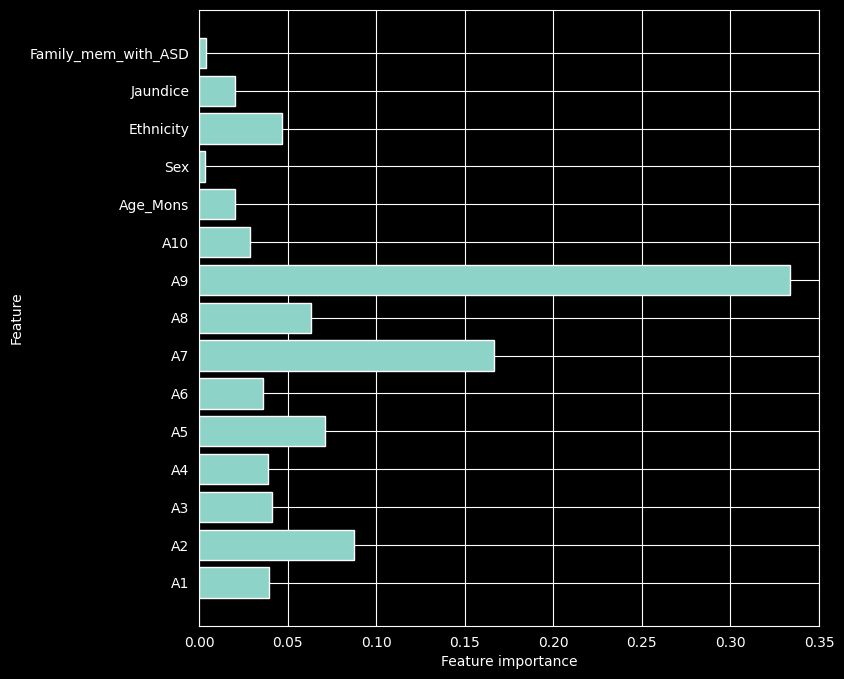

In [41]:
plot_feature_importances(model)

A9 is the most important feature, other important features are A6, A5, and A8. Features named A are answers to the questions. If the patient answers yes to the question, the feature gets 1 for yes. As many 1 was in each column, The column got its importance. Ethnicity and age in months are important features, Jandice and the type of gender'sex' are less important features. Genes in this study which appear through the column of a family member with ASD is not an important feature, and that's actually against the worldwide studies. I can refer to the small size of the sample under study.